# Mini Project: Exploratory Data Analysis

# Exploratory Data Analysis: Unveiling Insights from the NYC Taxi Dataset

Data has become the lifeblood of the modern world, permeating every aspect of our lives and transforming the way we make decisions. In this era of vast information, the ability to extract meaningful insights from raw data has emerged as a crucial skill. Enter exploratory data analysis (EDA), a powerful approach that allows us to unravel hidden patterns, detect anomalies, and generate valuable knowledge from the vast volumes of data at our disposal.

Exploratory data analysis serves as the initial step in any data-driven investigation, offering a comprehensive understanding of the dataset's structure, distributions, and relationships between variables. By applying statistical and visual techniques, analysts gain a deeper insight into the data, paving the way for more accurate predictions, informed decision-making, and the discovery of actionable insights.

To illustrate the significance of exploratory data analysis, we delve into one of the most popular and widely studied datasets in the field—the [NYC Taxi Dataset](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page). As the name suggests, this dataset captures detailed information about taxi trips within the bustling city of New York. The NYC Taxi Dataset is an ideal choice for learning and practicing EDA techniques due to its richness, complexity, and real-world applicability.

The dataset encompasses a vast range of attributes, including pickup and drop-off locations, timestamps, trip durations, passenger counts, payment information, and much more. By exploring this data, we can gain valuable insights into the dynamics of taxi usage, understand travel patterns across different neighborhoods, identify peak hours of demand, analyze fare structures, and even uncover interesting anecdotes about the city's vibrant life.

The NYC Taxi Dataset is an excellent resource for aspiring ML practitioners to develop their EDA skills. Its scale, complexity, and real-world relevance make it an engaging playground for uncovering hidden patterns, generating hypotheses, and forming data-driven narratives.

In this mini project, we will dive deep into the NYC Taxi Dataset. We will leverage various EDA techniques to unveil meaningful insights, visualize data distributions, identify outliers, and pose insightful questions that will fuel further analysis and exploration. By the end of this colab, students will have a solid foundation in exploratory data analysis and be equipped to tackle real-world data challenges with confidence.

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the NYC taxi dataset into a Pandas DataFrame and do a few basic checks to ensure the data is loaded properly. Note, there are several months of data that can be used. For simplicity, use the Yellow Taxi 2022-01 parquet file [here](https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-01.parquet). Here are your tasks:

  1. Load the `yellow_tripdata_2022-01.parquet` file into Pandas.
  2. Print the first 5 rows of data. Study the schema and make sure you understand what each of the fields mean by referencing the [documentation](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf).
  3. How many rows are in the dataset? How many unique columns are in the dataset?
  4. Which columns have NULL values and how many NULL values are present in each of these columns?
  5. Generate summary statistics using Pandas' [describe method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html). Do you notice anything unusual in the dataset? Find at least one anomoly and try to come up with a hypothesis to explain it.  
  6. Drop all rows with NULL values and store the result. We'll ignore NULL valued rows in this mini-project.


In [108]:
# Load parquet file into a Pandas DataFrame
yellow_trip_df = pd.read_parquet("https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-01.parquet")


In [109]:
# Display the first few rows of the dataset
yellow_trip_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [110]:
# Display the shape of the dataset
yellow_trip_df.shape

(2463931, 19)

In [111]:
# Check for missing values
yellow_trip_df.isnull().sum()

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,71503
trip_distance,0
RatecodeID,71503
store_and_fwd_flag,71503
PULocationID,0
DOLocationID,0
payment_type,0


In [112]:
# Summary statistics of the dataset
yellow_trip_df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,2.463931e+06,2463931,2463931,2.392428e+06,2.463931e+06,2.392428e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.392428e+06,2.392428e+06
mean,1.707819e+00,2022-01-17 01:19:51.689724,2022-01-17 01:34:04.421902,1.389453e+00,5.372751e+00,1.415507e+00,1.660768e+02,1.635807e+02,1.194449e+00,1.294648e+01,1.006710e+00,4.914539e-01,2.385696e+00,3.749773e-01,2.967234e-01,1.916937e+01,2.282322e+00,8.249935e-02
min,1.000000e+00,2008-12-31 22:23:09,2008-12-31 23:06:56,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-4.800000e+02,-4.500000e+00,-5.000000e-01,-1.252200e+02,-3.140000e+01,-3.000000e-01,-4.803000e+02,-2.500000e+00,-1.250000e+00
25%,1.000000e+00,2022-01-09 15:37:41,2022-01-09 15:50:50.500000,1.000000e+00,1.040000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,7.200000e-01,0.000000e+00,3.000000e-01,1.130000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2022-01-17 12:11:45,2022-01-17 12:23:49,1.000000e+00,1.740000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,3.000000e-01,1.469000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2022-01-24 13:49:37.500000,2022-01-24 14:02:51,1.000000e+00,3.130000e+00,1.000000e+00,2.340000e+02,2.360000e+02,1.000000e+00,1.400000e+01,2.500000e+00,5.000000e-01,3.000000e+00,0.000000e+00,3.000000e-01,2.002000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,2022-05-18 20:41:57,2022-05-18 20:47:45,9.000000e+00,3.061593e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,4.010923e+05,3.350000e+01,1.659000e+01,8.888800e+02,1.933000e+02,3.000000e-01,4.010956e+05,2.500000e+00,1.250000e+00
std,5.021375e-01,NaN,NaN,9.829686e-01,5.478714e+02,5.917573e+00,6.546806e+01,7.079016e+01,5.001778e-01,2.558149e+02,1.236226e+00,8.291560e-02,2.830698e+00,1.680538e+00,4.374741e-02,2.559641e+02,7.432040e-01,3.125554e-01


In [113]:
# Drop rows with missing values.
yellow_trip_df.dropna(inplace=True)

Feature engineering is a critical process in machine learning that involves selecting, transforming, and creating features from raw data to improve the performance and accuracy of predictive models. While machine learning algorithms have the capability to automatically learn patterns from data, the quality and relevance of the features used as inputs greatly influence the model's ability to generalize and make accurate predictions. Feature engineering, therefore, plays a crucial role in extracting meaningful information and representing it in a format that best captures the underlying relationships within the data.

Here are your tasks:

  1. Create a new feature that calculates the trip duration in minutes.
  2. Create additional features for the pick-up day of week and pick-up hour.
  3. Use the Seaborn library to create a [line plot](https://seaborn.pydata.org/generated/seaborn.lineplot.html) depicting the number of trips as a function of the hour of day. What's the busiest time of day?
  4. Create another lineplot depicting the number of trips as a function of the day of week. What day of the week is the least busy?

In [114]:
# Create a new column for trip duration in minutes
yellow_trip_df['trip_duration'] = (yellow_trip_df['tpep_dropoff_datetime'] - yellow_trip_df['tpep_pickup_datetime']).dt.total_seconds() / 60
yellow_trip_df['trip_duration'].head()

,trip_duration
0,17.816667
1,8.400000
2,8.966667
3,10.033333
4,37.533333


In [115]:
# Create new columns for pickup hour and day of week
yellow_trip_df['pickup_hour'] = yellow_trip_df['tpep_pickup_datetime'].dt.hour
yellow_trip_df['pickup_day_of_week'] = yellow_trip_df['tpep_pickup_datetime'].dt.dayofweek
# Replace the integer values for day of week with strings for the english names
dayofweek_dict = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
yellow_trip_df['pickup_day_of_week'] = yellow_trip_df['pickup_day_of_week'].map(dayofweek_dict)
yellow_trip_df[['pickup_hour', 'pickup_day_of_week']].head()

,pickup_hour,pickup_day_of_week
0,0,Saturday
1,0,Saturday
2,0,Saturday
3,0,Saturday
4,0,Saturday


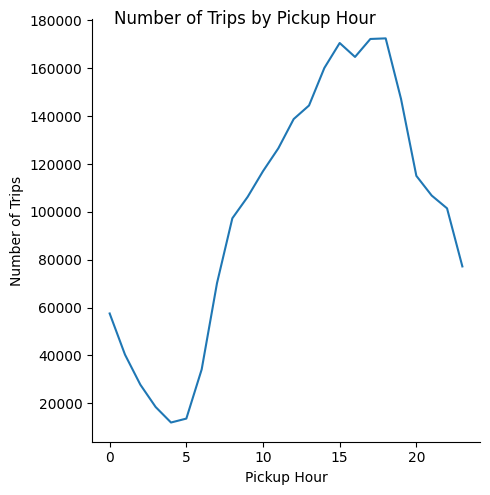

In [116]:
# Create a lineplot displaying the number of trips by pickup hour
# First, group by pickup hour and value_counts
pickup_hour_df = yellow_trip_df.groupby('pickup_hour', as_index= False).size()

pickup_hour_lineplot= sns.relplot(x= 'pickup_hour',
            y= 'size',
            data= pickup_hour_df,
            kind= 'line')

pickup_hour_lineplot.figure.suptitle('Number of Trips by Pickup Hour', ha= 'center')
pickup_hour_lineplot.set(xlabel= 'Pickup Hour',
                         ylabel= 'Number of Trips')
plt.show()


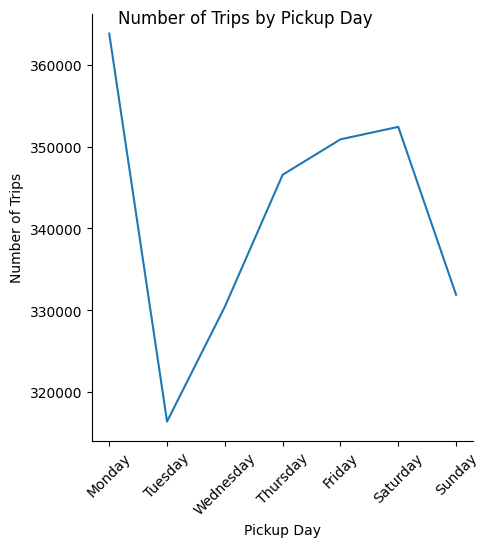

In [117]:
# Create a lineplot displaying the number of trips by pickup day
# First, groupby pickup day and size
pickup_day_df = yellow_trip_df.groupby('pickup_day_of_week', as_index= False).size()
# Translate the pickup day to a categorical variable and apply correct order
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pickup_day_df['pickup_day_of_week'] = pd.Categorical(pickup_day_df['pickup_day_of_week'], categories=days_order, ordered=True)

pickup_day_lineplot= sns.relplot(x= 'pickup_day_of_week',
            y= 'size',
            data= pickup_day_df,
            kind= 'line')

pickup_day_lineplot.figure.suptitle('Number of Trips by Pickup Day', ha= 'center')
pickup_day_lineplot.set(xlabel= 'Pickup Day',
                        ylabel= 'Number of Trips'
                        )
# clean up appearance
plt.xticks(rotation=45)
# show the plot
plt.show()

In the realm of machine learning, understanding the relationships between variables is crucial for building accurate and effective predictive models. One powerful tool for exploring these relationships is the correlation matrix. A correlation matrix provides a comprehensive overview of the pairwise correlations between variables in a dataset, allowing practitioners to quantify and visualize the strength and direction of these associations. This matrix is an essential component of exploratory data analysis and offers several key benefits:

1. Relationship Assessment: The correlation matrix provides a quantitative measure of the relationship between variables. By calculating correlation coefficients, typically using methods like Pearson's correlation coefficient, analysts can determine if variables are positively correlated (increase together), negatively correlated (one increases as the other decreases), or uncorrelated (no systematic relationship). These measures offer insights into the direction and strength of the relationships, helping to identify important variables that may influence the target variable.

2. Feature Selection: Correlation matrices are invaluable in feature selection, which involves identifying the most relevant variables for building predictive models. By examining the correlations between the target variable and other features, analysts can identify highly correlated variables that may be strong predictors. This knowledge enables informed decisions regarding which variables to include in the model, potentially reducing dimensionality, enhancing model efficiency, and preventing issues such as multicollinearity.

3. Multicollinearity Detection: Multicollinearity occurs when two or more independent variables in a model are highly correlated. This can lead to problems such as instability in coefficient estimates, difficulty in interpreting feature importance, and reduced model robustness. By examining the correlation matrix, analysts can identify highly correlated variables and make informed decisions about which ones to include or exclude to mitigate multicollinearity. Removing redundant variables improves model interpretability and generalization.

Here is your task:

  1. Compute a correlation matrix between the variables 'trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'trip_duration' and use Seaborn to create a heatmap of the results. Which variables are strongly correlated?

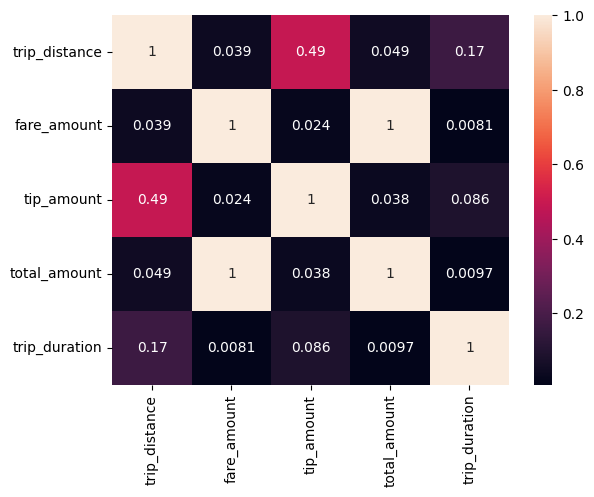

In [118]:
# Compute correlation matrix of numerical variables
corr_matrix = yellow_trip_df[['trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'trip_duration']].corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot= True)
plt.show()

Pairplots, also known as scatterplot matrices, allow for the visualization of pairwise relationships between multiple variables simultaneously. Each subplot in the pairplot represents the scatterplot of one variable against another. Pairplots offer several advantages in EDA:

  - Variable Relationships: Pairplots enable analysts to explore the relationships between variables, revealing patterns such as linear or nonlinear correlations, clusters, or other associations. These visual cues guide further analysis, feature selection, or modeling decisions.

  - Multivariate Analysis: Pairplots help identify multivariate dependencies and interactions, highlighting how different variables jointly influence one another. This is particularly valuable in identifying potential confounding factors or discovering hidden interactions that may not be apparent when considering variables in isolation.

  - Outlier Detection: Pairplots can reveal potential outliers by showing data points that deviate significantly from the general pattern observed between variables. Outliers can indicate data anomalies or influential observations that may impact model performance.

  - Feature Importance: Pairplots provide an intuitive representation of the relative importance of different features. Variables exhibiting strong correlations or clear patterns may be more relevant for predictive modeling or feature selection.

  - Data Quality: Pairplots can help identify data quality issues, such as data entry errors or measurement inconsistencies. Patterns that do not align with expectations or exhibit unusual trends may signal data problems that require further investigation or preprocessing.

Here is your task:

  1. Create a [pairplot matrix](https://seaborn.pydata.org/generated/seaborn.pairplot.html) using Seaborn to observation the relationship between the following variables: trip_distance, fare_amount, tip_amount, total_amount, trip_duration. Note, pairplots can be memory intensive. Try sampling the dataset using the [sample method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html) in Pandas. Which variables appear to have a strong relationship? Which variables seem to have no relationship?

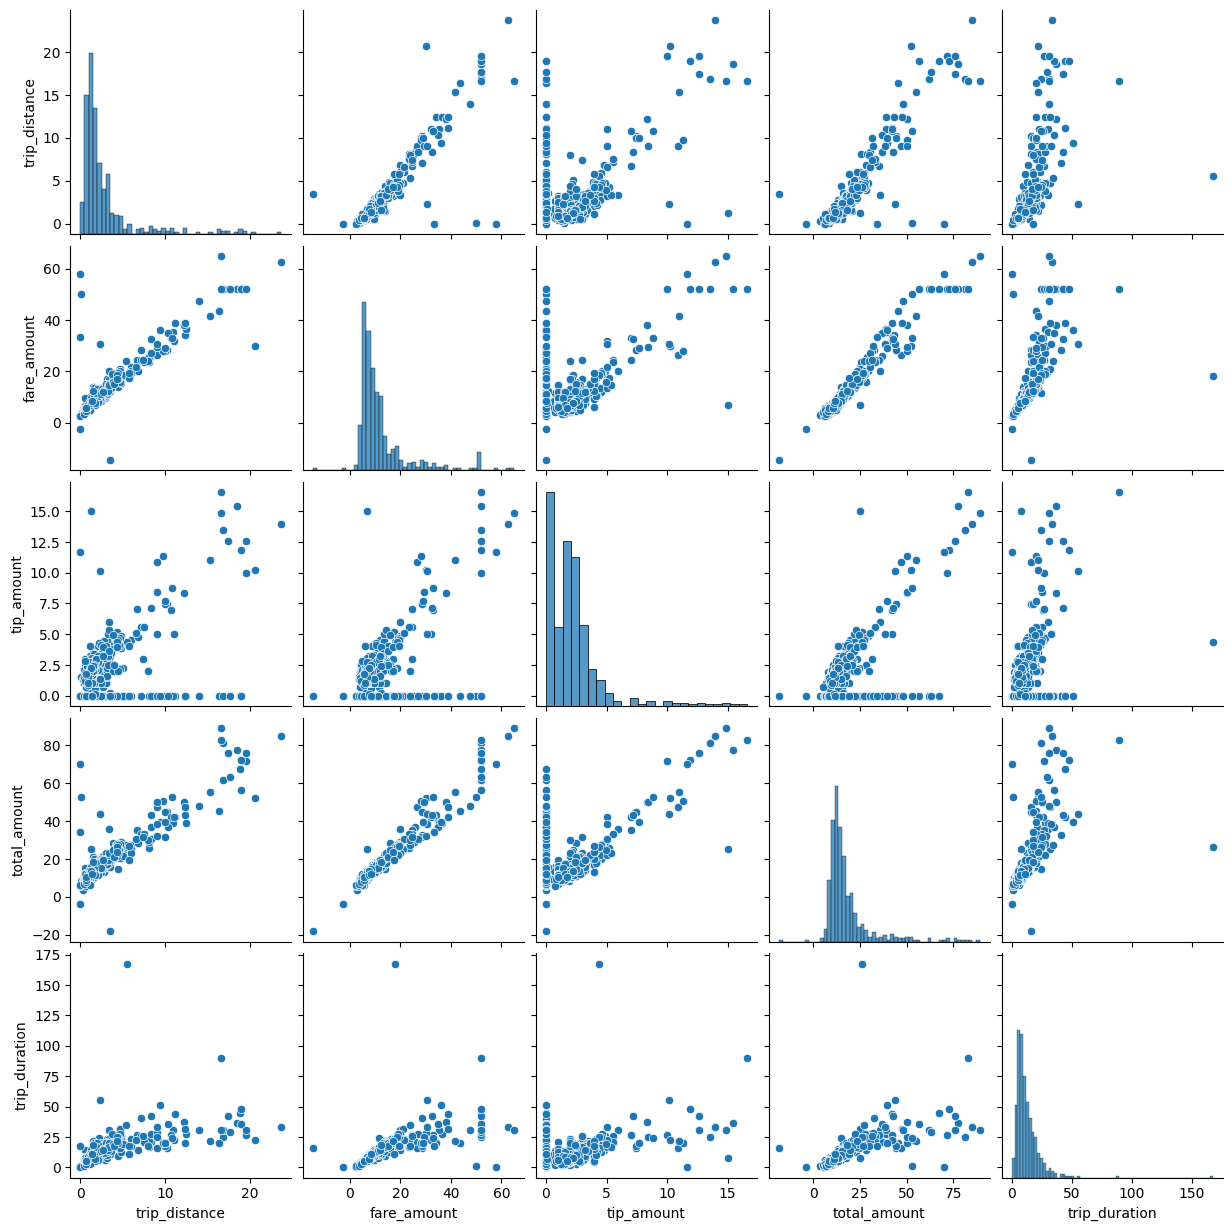

In [119]:
# Create a scatter plot matrix of numerical variables. If memory issues try the df.sample method.
sns.pairplot(yellow_trip_df[['trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'trip_duration']].sample(500, random_state= 42))
plt.show()

A count plot is a type of categorical plot that displays the number of occurrences of each category in a dataset. It is particularly useful for visualizing the distribution and frequency of categorical variables. Here are some key uses and benefits of count plots:

  - Categorical Variable Exploration: Count plots provide a quick and concise summary of the distribution of categorical variables. They allow analysts to understand the frequency or count of each category, revealing the proportions and imbalances within the dataset. This information is crucial for gaining insights into the composition and characteristics of categorical variables.

  - Class Imbalance Assessment: In classification tasks, count plots help assess the balance or imbalance of different target classes. It provides a visual representation of the distribution of classes, highlighting any significant discrepancies in the sample sizes across categories. Identifying imbalanced classes is important in machine learning as it can affect model performance and bias the predictions towards the majority class.

  - Data Quality Inspection: Count plots can be utilized to detect data quality issues in categorical variables. It allows analysts to identify unexpected or erroneous categories that may indicate data entry errors, missing data, or inconsistencies in the dataset. By observing the counts for each category, anomalies or discrepancies can be easily spotted, enabling data cleaning or further investigation if necessary.

  - Feature Importance Evaluation: Count plots can provide insights into the importance or relevance of different categorical features in relation to the target variable. By visualizing the distribution of categories within each class or target level, analysts can determine which categories are more prevalent or have higher frequencies for specific outcomes. This understanding helps in assessing the discriminatory power of categorical features and their potential impact on predictive models.

Here is your task:

  1. Use Seaborn to create a [countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html) for the variables PULocationID, and DOLocationID. Keep only the top 15 pick-up and drop-off locations. What's the most popular pick-up location?

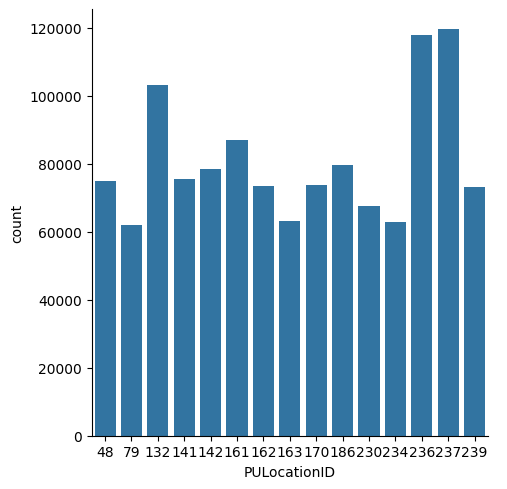

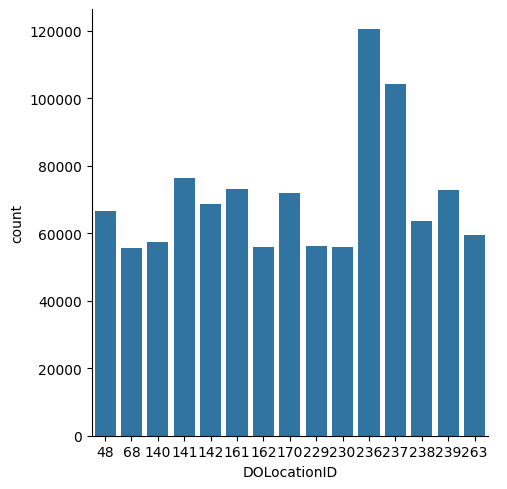

In [120]:
# Create a Seaborn countplot for PULocationID and DOLocationID. Only plot the top 15 categories by value counts.
# find the top 15 PU and DO location IDs
top15PU_df = yellow_trip_df.PULocationID.value_counts().nlargest(15).index
top15DO_df= yellow_trip_df.DOLocationID.value_counts().nlargest(15).index

# filter the original data for PU location and DO location to inlcude only rows in the top 15
yellow_trip_top15_PU_df = yellow_trip_df[yellow_trip_df.PULocationID.isin(top15PU_df)]
yellow_trip_top15_DO_df = yellow_trip_df[yellow_trip_df.DOLocationID.isin(top15DO_df)]


# create and show catplot
sns.catplot(x= 'PULocationID',
           data= yellow_trip_top15_PU_df,
           kind= 'count')
sns.catplot(x= 'DOLocationID',
           data= yellow_trip_top15_DO_df,
           kind= 'count')
plt.show()



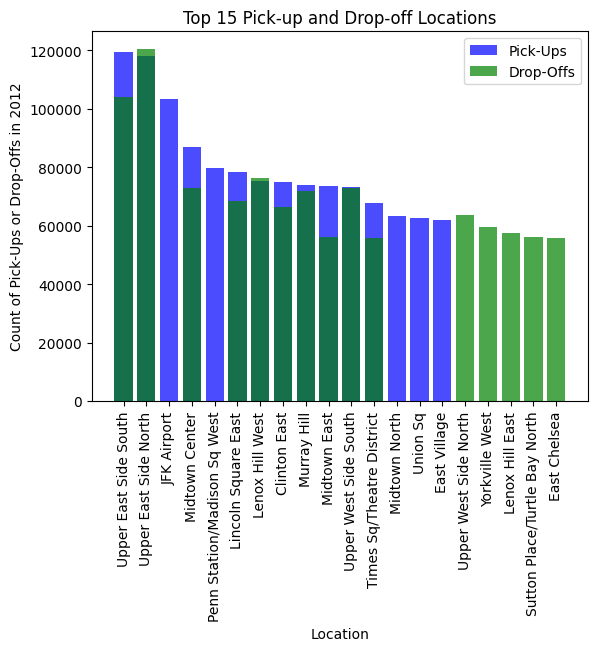

                     DOLocationID   count
0           Upper East Side North  120457
1           Upper East Side South  104116
2                 Lenox Hill West   76478
3                  Midtown Center   72984
4           Upper West Side South   72962
5                     Murray Hill   71971
6             Lincoln Square East   68602
7                    Clinton East   66589
8           Upper West Side North   63741
9                  Yorkville West   59461
10                Lenox Hill East   57510
11  Sutton Place/Turtle Bay North   56307
12                   Midtown East   55985
13      Times Sq/Theatre District   55945
14                   East Chelsea   55667


In [121]:
# After Looking at this I decided to take a different approach to improve legibility

# The following dictionary was scraped from NYC Open Data Website Map of Taxi Zones
# This is available at https://data.cityofnewyork.us/Transportation/NYC-Taxi-Zones/d3c5-ddgc
LocationID_map = {1: 'Newark Airport', 2: 'Jamaica Bay', 3: 'Allerton/Pelham Gardens', 4: 'Alphabet City', 5: 'Arden Heights', 6: 'Arrochar/Fort Wadsworth', 7: 'Astoria', 8: 'Astoria Park', 9: 'Auburndale', 24: 'Bloomingdale', 10: 'Baisley Park', 11: 'Bath Beach', 12: 'Battery Park', 13: 'Battery Park City', 18: 'Bedford Park', 25: 'Boerum Hill', 14: 'Bay Ridge', 15: 'Bay Terrace/Fort Totten', 22: 'Bensonhurst West', 23: 'Bloomfield/Emerson Hill', 16: 'Bayside', 17: 'Bedford', 19: 'Bellerose', 20: 'Belmont', 21: 'Bensonhurst East', 26: 'Borough Park', 27: 'Breezy Point/Fort Tilden/Riis Beach', 28: 'Briarwood/Jamaica Hills', 33: 'Brooklyn Heights', 29: 'Brighton Beach', 31: 'Bronx Park', 32: 'Bronxdale', 30: 'Broad Channel', 34: 'Brooklyn Navy Yard', 35: 'Brownsville', 36: 'Bushwick North', 37: 'Bushwick South', 38: 'Cambria Heights', 39: 'Canarsie', 40: 'Carroll Gardens', 41: 'Central Harlem', 45: 'Chinatown', 46: 'City Island', 42: 'Central Harlem North', 43: 'Central Park', 44: 'Charleston/Tottenville', 47: 'Claremont/Bathgate', 48: 'Clinton East', 49: 'Clinton Hill', 50: 'Clinton West', 51: 'Co-Op City', 52: 'Cobble Hill', 53: 'College Point', 54: 'Columbia Street', 55: 'Coney Island', 56: 'Corona', 58: 'Country Club', 59: 'Crotona Park', 60: 'Crotona Park East', 61: 'Crown Heights North', 62: 'Crown Heights South', 63: 'Cypress Hills', 64: 'Douglaston', 65: 'Downtown Brooklyn/MetroTech', 72: 'East Flatbush/Remsen Village', 66: 'DUMBO/Vinegar Hill', 67: 'Dyker Heights', 68: 'East Chelsea', 73: 'East Flushing', 69: 'East Concourse/Concourse Village', 70: 'East Elmhurst', 71: 'East Flatbush/Farragut', 79: 'East Village', 80: 'East Williamsburg', 74: 'East Harlem North', 85: 'Erasmus', 86: 'Far Rockaway', 75: 'East Harlem South', 76: 'East New York', 77: 'East New York/Pennsylvania Avenue', 78: 'East Tremont', 81: 'Eastchester', 87: 'Financial District North', 82: 'Elmhurst', 83: 'Elmhurst/Maspeth', 84: "Eltingville/Annadale/Prince's Bay", 88: 'Financial District South', 89: 'Flatbush/Ditmas Park', 90: 'Flatiron', 125: 'Hudson Sq', 91: 'Flatlands', 92: 'Flushing', 93: 'Flushing Meadows-Corona Park', 94: 'Fordham South', 95: 'Forest Hills', 96: 'Forest Park/Highland Park', 97: 'Fort Greene', 98: 'Fresh Meadows', 99: 'Freshkills Park', 100: 'Garment District', 101: 'Glen Oaks', 102: 'Glendale', 103: "Governor's Island/Ellis Island/Liberty Island", 106: 'Gowanus', 107: 'Gramercy', 108: 'Gravesend', 109: 'Great Kills', 110: 'Great Kills Park', 111: 'Green-Wood Cemetery', 112: 'Greenpoint', 113: 'Greenwich Village North', 114: 'Greenwich Village South', 115: 'Grymes Hill/Clifton', 116: 'Hamilton Heights', 117: 'Hammels/Arverne', 118: 'Heartland Village/Todt Hill', 119: 'Highbridge', 120: 'Highbridge Park', 149: 'Madison', 150: 'Manhattan Beach', 121: 'Hillcrest/Pomonok', 122: 'Hollis', 123: 'Homecrest', 124: 'Howard Beach', 126: 'Hunts Point', 127: 'Inwood', 128: 'Inwood Hill Park', 129: 'Jackson Heights', 134: 'Kew Gardens', 151: 'Manhattan Valley', 130: 'Jamaica', 139: 'Laurelton', 131: 'Jamaica Estates', 132: 'JFK Airport', 133: 'Kensington', 140: 'Lenox Hill East', 135: 'Kew Gardens Hills', 136: 'Kingsbridge Heights', 137: 'Kips Bay', 141: 'Lenox Hill West', 142: 'Lincoln Square East', 152: 'Manhattanville', 138: 'LaGuardia Airport', 143: 'Lincoln Square West', 144: 'Little Italy/NoLiTa', 145: 'Long Island City/Hunters Point', 146: 'Long Island City/Queens Plaza', 147: 'Longwood', 148: 'Lower East Side', 153: 'Marble Hill', 154: 'Marine Park/Floyd Bennett Field', 155: 'Marine Park/Mill Basin', 156: 'Mariners Harbor', 159: 'Melrose South', 157: 'Maspeth', 158: 'Meatpacking/West Village West', 160: 'Middle Village', 161: 'Midtown Center', 162: 'Midtown East', 163: 'Midtown North', 164: 'Midtown South', 170: 'Murray Hill', 165: 'Midwood', 166: 'Morningside Heights', 167: 'Morrisania/Melrose', 178: 'Ocean Parkway South', 168: 'Mott Haven/Port Morris', 169: 'Mount Hope', 171: 'Murray Hill-Queens', 172: 'New Dorp/Midland Beach', 173: 'North Corona', 174: 'Norwood', 175: 'Oakland Gardens', 179: 'Old Astoria', 176: 'Oakwood', 177: 'Ocean Hill', 180: 'Ozone Park', 181: 'Park Slope', 182: 'Parkchester', 183: 'Pelham Bay', 184: 'Pelham Bay Park', 185: 'Pelham Parkway', 186: 'Penn Station/Madison Sq West', 189: 'Prospect Heights', 190: 'Prospect Park', 187: 'Port Richmond', 188: 'Prospect-Lefferts Gardens', 191: 'Queens Village', 192: 'Queensboro Hill', 193: 'Queensbridge/Ravenswood', 194: 'Randalls Island', 196: 'Rego Park', 195: 'Red Hook', 203: 'Rosedale', 197: 'Richmond Hill', 198: 'Ridgewood', 199: 'Rikers Island', 212: 'Soundview/Bruckner', 213: 'Soundview/Castle Hill', 200: 'Riverdale/North Riverdale/Fieldston', 204: 'Rossville/Woodrow', 201: 'Rockaway Park', 202: 'Roosevelt Island', 205: 'Saint Albans', 206: 'Saint George/New Brighton', 207: 'Saint Michaels Cemetery/Woodside', 208: 'Schuylerville/Edgewater Park', 209: 'Seaport', 210: 'Sheepshead Bay', 211: 'SoHo', 214: 'South Beach/Dongan Hills', 215: 'South Jamaica', 216: 'South Ozone Park', 217: 'South Williamsburg', 218: 'Springfield Gardens North', 219: 'Springfield Gardens South', 225: 'Stuyvesant Heights', 220: 'Spuyten Duyvil/Kingsbridge', 224: 'Stuy Town/Peter Cooper Village', 226: 'Sunnyside', 221: 'Stapleton', 222: 'Starrett City', 223: 'Steinway', 227: 'Sunset Park East', 228: 'Sunset Park West', 229: 'Sutton Place/Turtle Bay North', 230: 'Times Sq/Theatre District', 231: 'TriBeCa/Civic Center', 239: 'Upper West Side South', 232: 'Two Bridges/Seward Park', 233: 'UN/Turtle Bay South', 234: 'Union Sq', 235: 'University Heights/Morris Heights', 236: 'Upper East Side North', 237: 'Upper East Side South', 238: 'Upper West Side North', 240: 'Van Cortlandt Park', 241: 'Van Cortlandt Village', 258: 'Woodhaven', 242: 'Van Nest/Morris Park', 245: 'West Brighton', 263: 'Yorkville West', 243: 'Washington Heights North', 244: 'Washington Heights South', 253: 'Willets Point', 246: 'West Chelsea/Hudson Yards', 247: 'West Concourse', 248: 'West Farms/Bronx River', 249: 'West Village', 257: 'Windsor Terrace', 250: 'Westchester Village/Unionport', 251: 'Westerleigh', 252: 'Whitestone', 254: 'Williamsbridge/Olinville', 255: 'Williamsburg (North Side)', 256: 'Williamsburg (South Side)', 259: 'Woodlawn/Wakefield', 260:
'Woodside', 261: 'World Trade Center', 262: 'Yorkville East'}

top15PU_df = yellow_trip_df.PULocationID.value_counts().nlargest(15).reset_index()
top15DO_df= yellow_trip_df.DOLocationID.value_counts().nlargest(15).reset_index()

top15PU_df.PULocationID = top15PU_df.PULocationID.map(LocationID_map)
top15DO_df.DOLocationID = top15DO_df.DOLocationID.map(LocationID_map)

# create and show barplot
plt.bar(top15PU_df['PULocationID'], top15PU_df['count'], color= 'blue', alpha= 0.7)
plt.bar(top15DO_df['DOLocationID'], top15DO_df['count'], color= 'green', alpha= 0.7)
plt.xticks(rotation=90)
plt.xlabel('Location')
plt.ylabel('Count of Pick-Ups or Drop-Offs in 2012')
plt.title('Top 15 Pick-up and Drop-off Locations')
plt.legend(['Pick-Ups', 'Drop-Offs'])
plt.show()

In [122]:
# I still think I can do this better... I'm really digging into Seaboarn vs. Pyplot right now

# Verify locations are of type string
top15PU_df['PULocationID'] = top15PU_df['PULocationID'].astype(str)
top15DO_df['DOLocationID'] = top15DO_df['DOLocationID'].astype(str)

# Rename the location columns to a common name
top15PU_rename_df = top15PU_df.rename(columns= {'PULocationID': 'Location', 'count': 'Count of Pick-Ups'})
top15DO_rename_df = top15DO_df.rename(columns= {'DOLocationID': 'Location', 'count': 'Count of Drop-Offs'})

In [123]:
# Merge the two DataFrames on the 'Location' column
top_locations = pd.merge(top15PU_rename_df, top15DO_rename_df, on='Location', how='outer')

# Fill any missing values with 0
top_locations.fillna(0, inplace=True)

In [124]:
# Melt for Easier Plotting and arrange for easier viewing
top_locations['Total'] = top_locations['Count of Pick-Ups'] + top_locations['Count of Drop-Offs']

# Step 2: Sort the DataFrame by the 'Total' column
top_locations_sorted = top_locations.sort_values(by='Total', ascending=False)


# Step 3: Melt the sorted DataFrame for Seaborn
top_locations_melted = top_locations_sorted.melt(id_vars='Location',
                                                 value_vars=['Count of Pick-Ups', 'Count of Drop-Offs'],
                                                 var_name='Type', value_name='Count')

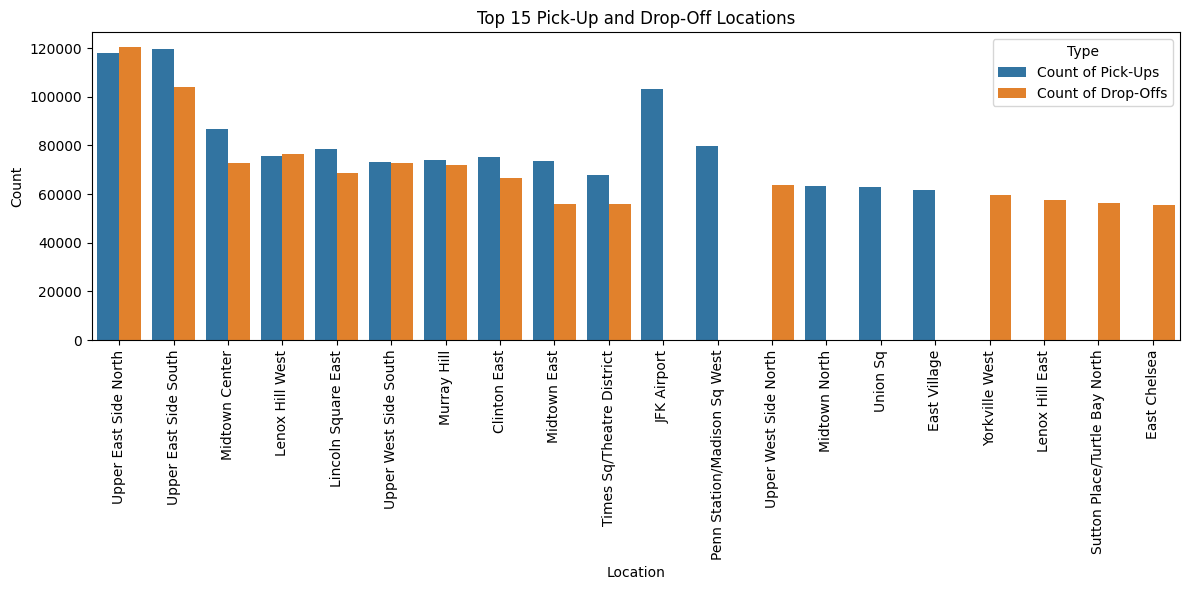

In [125]:
# Create a grouped bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Location', y='Count', hue='Type', data=top_locations_melted)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set labels and title
plt.xlabel('Location')
plt.ylabel('Count of Pick-Ups or Drop-Offs in 2012')
plt.title('Top 15 Pick-Up and Drop-Off Locations')

"""I want to add a note using plt.txt() to explain that the missing bars are
just from that location not making the top 15 counts for the type but I don't
know how to place it somewhere that is readable. """

# Show the plot
plt.tight_layout()
plt.show()

A box plot, also known as a box-and-whisker plot, is a powerful visualization tool for displaying the distribution, variability, and outliers within a numerical dataset. It provides a concise summary of key statistical measures and offers several important uses:

  - Data Distribution and Skewness: Box plots offer a visual representation of the distribution of numerical data, providing insights into its central tendency, spread, and skewness. The box represents the interquartile range (IQR), which contains the middle 50% of the data, with the median indicated by a horizontal line within the box. By observing the length and symmetry of the box, analysts can assess whether the data is skewed or symmetrically distributed.

  - Outlier Detection: Box plots are highly effective in identifying outliers, which are data points that deviate significantly from the rest of the distribution. The whiskers of the plot extend to the minimum and maximum non-outlier values, with any data points beyond the whiskers considered as potential outliers. Outliers can indicate data errors, anomalies, or important observations requiring further investigation.

  - Comparing Groups or Categories: Box plots are useful for comparing the distributions of numerical data across different groups or categories. By creating side-by-side or grouped box plots, analysts can easily compare the central tendencies, spreads, and shapes of distributions between different groups. This allows for the identification of differences, similarities, or patterns within the data.

  - Variability and Spread: Box plots provide insights into the variability and spread of the data. The length of the box indicates the spread of the middle 50% of the data, while the whiskers show the range of non-outlier values. By comparing the lengths of the boxes and whiskers, analysts can assess the relative variability between different groups or categories, aiding in the understanding of the data's dispersion.

  - Skewedness and Symmetry: Box plots offer a visual assessment of the skewness or symmetry of the data distribution. A symmetrical distribution is represented by a box plot with an equal length on both sides of the median, while a skewed distribution is indicated by a longer box on one side. This visual cue helps in understanding the shape and characteristics of the data, assisting in further analysis and modeling decisions.

  - Data Range and Quartiles: Box plots display the quartiles of the data distribution. The lower quartile (Q1) represents the 25th percentile, the upper quartile (Q3) represents the 75th percentile, and the interquartile range (IQR) is the range between Q1 and Q3. These quartiles provide a summary of the range and spread of the central portion of the data, aiding in the understanding of the data's variability and dispersion.

Your task is:

  1. Use Seaborn's [boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html) to discern the relationship between payment_type and total_amount. Does anything look weird? Can you explain what's going on?

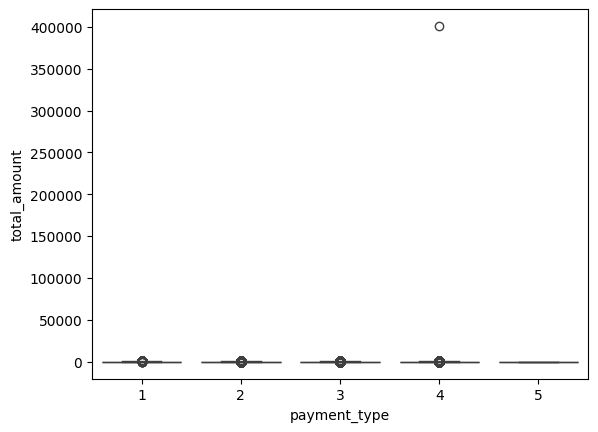

In [126]:
# Create a box plot of total amount by payment type. Do you see anything odd?
sns.boxplot(x= 'payment_type',
            y= 'total_amount',
            data= yellow_trip_df)
plt.show()

In [127]:
# Yeah... That's a heck of an outlier up there.

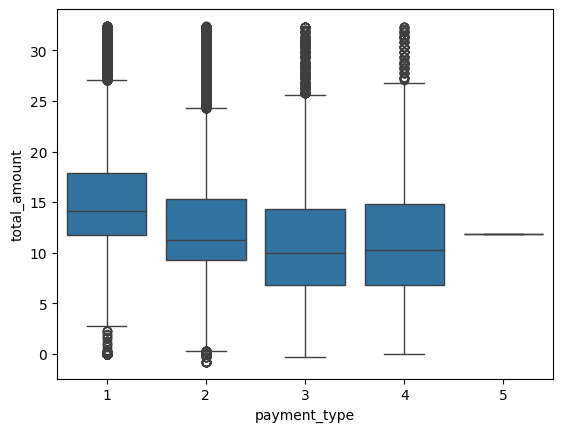

In [128]:
# Remove outliers outside of 1.5 IQR
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = yellow_trip_df['total_amount'].quantile(0.25)
Q3 = yellow_trip_df['total_amount'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame for outliers
yellow_trip_filtered_for_total_amount_non_outliers = yellow_trip_df[(yellow_trip_df['total_amount'] >= lower_bound) & (yellow_trip_df['total_amount'] <= upper_bound)]

sns.boxplot(x= 'payment_type',
            y= 'total_amount',
            data= yellow_trip_filtered_for_total_amount_non_outliers)
plt.show()

A histogram is a graphical representation that displays the distribution of a continuous or discrete numerical variable. It provides insights into the underlying data distribution and helps uncover patterns, frequencies, and ranges within the dataset. Here are some key uses and benefits of histogram plots:

  - Data Distribution: Histograms allow analysts to visualize the shape, central tendency, and spread of the data. They provide an overview of the data distribution, helping to identify if it follows a particular pattern, such as a normal distribution, skewed distribution, bimodal distribution, or multimodal distribution. Understanding the data distribution aids in selecting appropriate analysis techniques and understanding the characteristics of the data.

  - Frequency Analysis: Histograms display the frequency or count of data points within predefined bins or intervals along the x-axis. By observing the height or count of each bin, analysts can identify the frequency of occurrence for different values or value ranges. This information helps assess the concentration of data points and identify peaks or modes in the distribution.

  - Outlier Detection: Histograms can assist in identifying outliers, which are data points that significantly deviate from the rest of the distribution. Outliers may indicate data errors, unusual observations, or important anomalies requiring further investigation. By examining the tails or extreme values in the histogram, analysts can identify potential outliers that may require additional scrutiny.

  - Data Range and Spread: Histograms provide insights into the range and spread of the data. The x-axis represents the variable's values, while the y-axis represents the frequency or count of occurrences. By observing the width and span of the histogram, analysts can assess the data's range and variability. This information helps understand the data's spread and aids in subsequent analysis or decision-making processes.

  - Feature Engineering: Histograms can guide feature engineering processes by informing appropriate transformations, binning strategies, or encoding techniques for numerical variables. They assist in identifying nonlinear relationships or determining optimal cut-off points for converting continuous variables into categorical ones. Histograms also help identify data skewness and guide transformation methods to address the skew if necessary.

  - Data Quality Inspection: Histograms can be useful in detecting data quality issues or anomalies. Unusual spikes, gaps, or unexpected patterns in the histogram may indicate data entry errors, measurement inconsistencies, or missing data. By observing the histogram, analysts can identify potential data quality issues that require further investigation or preprocessing.

Your task is:

  1. Use Seaborn's [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) to explore the data distributions for fare_amount, trip_distance, and extra. Use kernel density estimators to better visualize the distribution. Use sampling if you run into any memory issues.

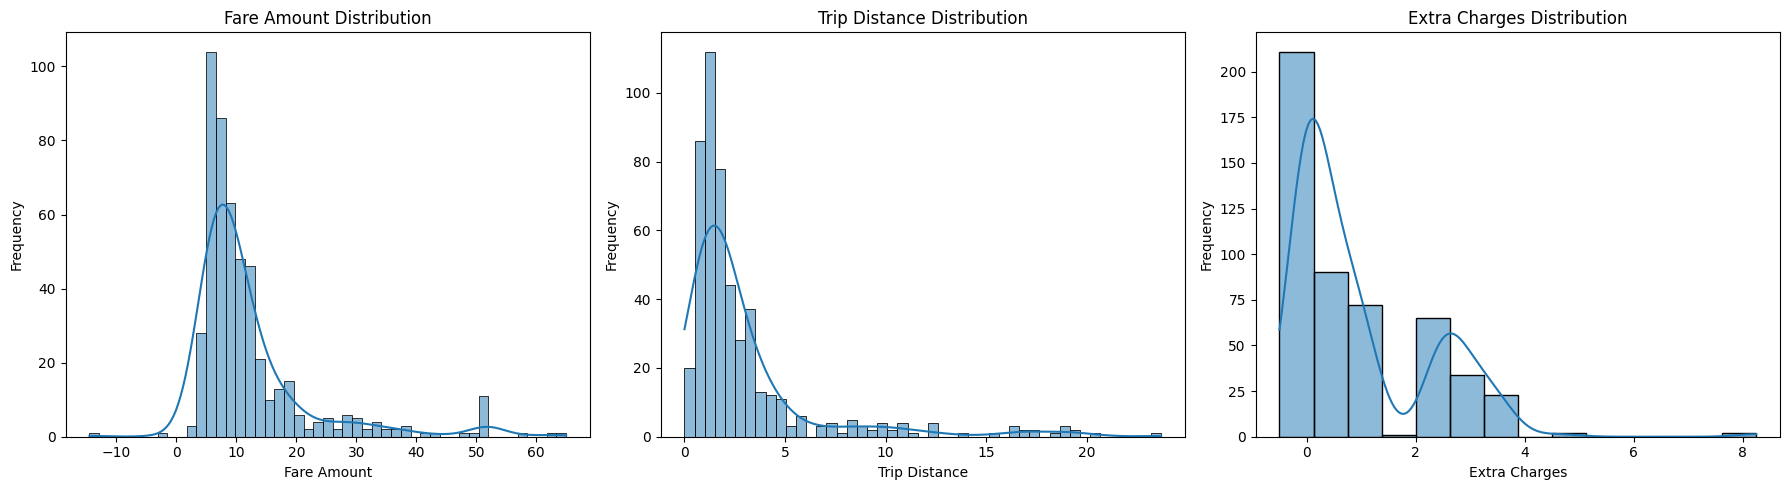

In [129]:
# Explore data distributions for 'fare_amount', 'trip_distance' and 'extra' using Seaborn's histplot. Sample the data if you run into memory issues.
# Sample the data
fare_amount_sample = yellow_trip_df['fare_amount'].sample(500, random_state=42)
trip_distance_sample = yellow_trip_df['trip_distance'].sample(500, random_state=42)
extra_sample = yellow_trip_df['extra'].sample(500, random_state=42)

# Establish the axes object
fig, axs = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

# Plot each histogram in a separate subplot
sns.histplot(fare_amount_sample, kde=True, ax=axs[0])
axs[0].set_title('Fare Amount Distribution')
axs[0].set_xlabel('Fare Amount')
axs[0].set_ylabel('Frequency')

sns.histplot(trip_distance_sample, kde=True, ax=axs[1])
axs[1].set_title('Trip Distance Distribution')
axs[1].set_xlabel('Trip Distance')
axs[1].set_ylabel('Frequency')

sns.histplot(extra_sample, kde=True, ax=axs[2])
axs[2].set_title('Extra Charges Distribution')
axs[2].set_xlabel('Extra Charges')
axs[2].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
